In [1]:
import warnings
warnings.filterwarnings('ignore')

# Defining Data Directory Path

In [2]:
import os
from pathlib import Path

In [3]:
DATA_DIRECTORY = Path('Data')
TRAIN_CSV = os.path.join(DATA_DIRECTORY,"train.csv")
TEST_CSV = os.path.join(DATA_DIRECTORY,"test.csv")

# Loading the Data

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Information

In [6]:
train_df.shape

(45211, 17)

In [7]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
train_df.isnull().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### `No Missing values found in the data`

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### `Numerical Features --> 7`
#### `Categorical Features --> 10`

# Spliting Numerical and Categorical Data

In [10]:
numerical_df = train_df.select_dtypes(exclude='object')
numerical_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [11]:
categorical_df = train_df.select_dtypes(include='object')
categorical_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


# Numerical Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

In [13]:
numerical_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


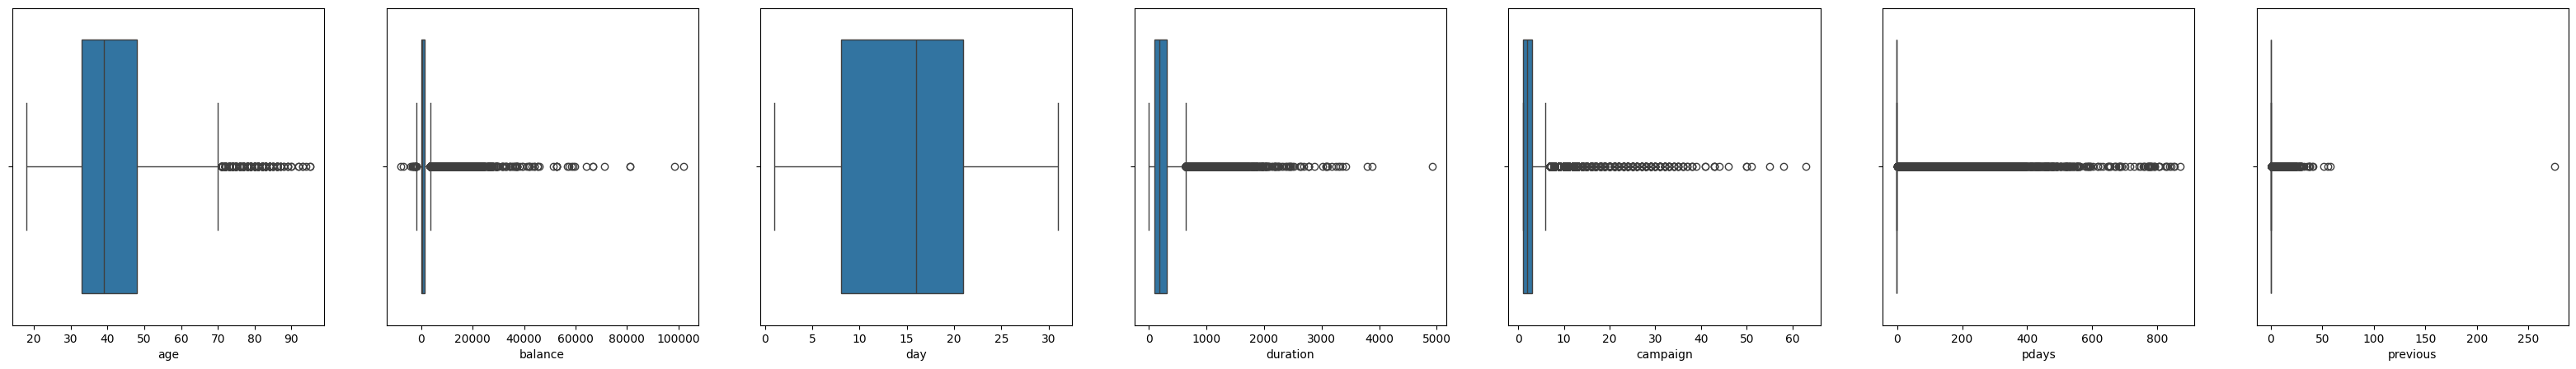

In [14]:
plt.figure(figsize=(40,5))

columns = numerical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.boxplot(data = numerical_df,x = col)

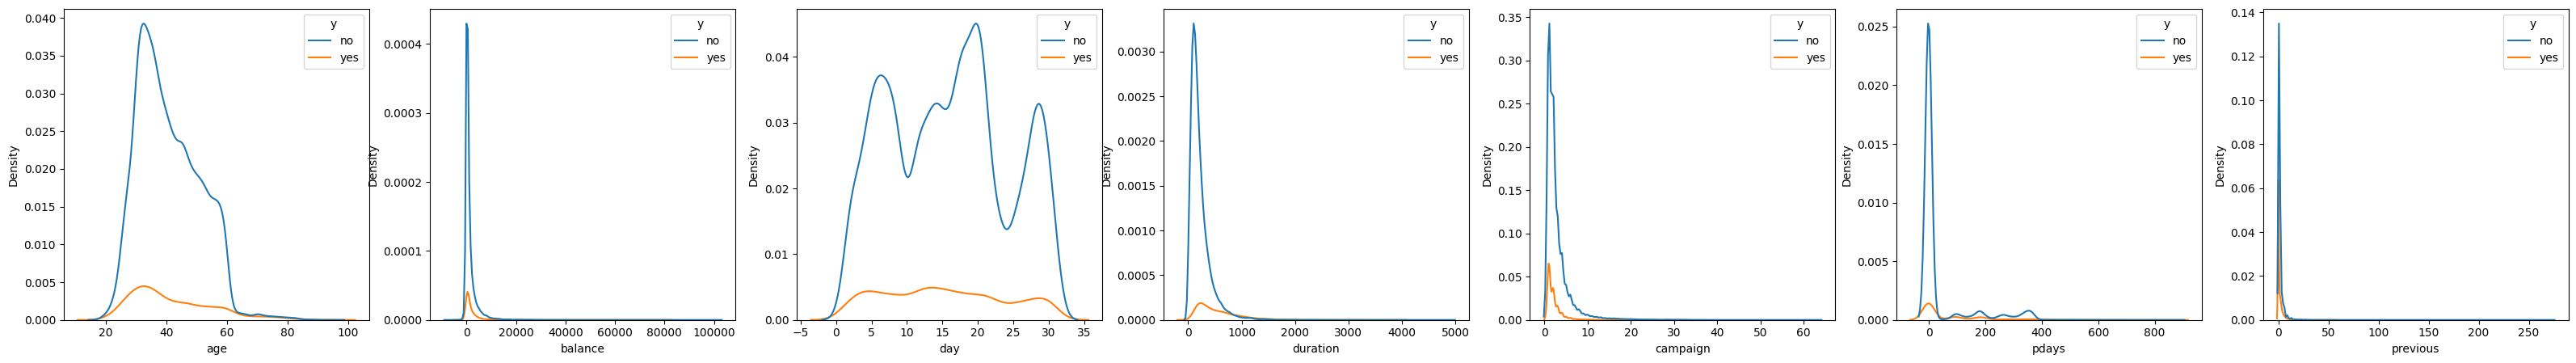

In [15]:
plt.figure(figsize=(40,5))

columns = numerical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1) 
    sns.kdeplot(data = train_df,x = col,hue= "y")

#### `From KDE we can deduce that there is no difference in range of age, balance, day, duration, campaign, pdays and previous for people opting and not opting for TERM-DEPOSIT`

# Categorical Analysis

In [ ]:
plt.figure(figsize=(40,25))

columns = categorical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,5,idx+1) 
    sns.countplot(data = categorical_df,x=col,hue="y")
    plt.xticks(rotation = 90)
  

In [ ]:
plt.figure(figsize=(40,25))

columns = categorical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,5,idx+1) 
    sns.countplot(data = categorical_df[categorical_df["y"]=="no"],x=col,color="blue")
    plt.xticks(rotation = 90)
  

In [ ]:
plt.figure(figsize=(40,25))

columns = categorical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,5,idx+1) 
    sns.countplot(data = categorical_df[categorical_df["y"]=="yes"],x=col,color="orange")
    plt.xticks(rotation = 90)
  

#### `A married person with secondry education having no (credit, Housing and personal loans) and working in management is more likely to subcribe the bank term deposits if person is contacted via celluar in month of may having unkown outcome in previous marketing campaign.`

In [ ]:
plt.figure(figsize=(40,60))

categorical_columns = categorical_df.columns
numerical_columns = numerical_df.columns
idx = 1


for cat_col in categorical_columns:
    
    subscribed_df = train_df[train_df["y"]=="yes"]
    highest_label = subscribed_df[cat_col].value_counts().index[0]

    if cat_col =="y":
        continue
    
    data = subscribed_df[subscribed_df[cat_col]==highest_label]

    for num_col in numerical_columns:
        plt.subplot(9,7,idx) 
        sns.kdeplot(data = data,x=num_col,color="orange")
        idx+=1
        plt.title(f"{highest_label} {cat_col}")
    
  

In [ ]:
plt.figure(figsize=(40,60))

categorical_columns = categorical_df.columns
numerical_columns = numerical_df.columns
idx = 1


for cat_col in categorical_columns:
    
    subscribed_df = train_df[train_df["y"]=="no"]
    highest_label = subscribed_df[cat_col].value_counts().index[0]

    if cat_col =="y":
        continue
    
    data = subscribed_df[subscribed_df[cat_col]==highest_label]

    for num_col in numerical_columns:
        plt.subplot(9,7,idx) 
        sns.kdeplot(data = data,x=num_col,color="blue")
        idx+=1
        plt.title(f"{highest_label} {cat_col}")
    
  

In [40]:
subscribed_df = train_df[train_df["y"]=="yes"]
subscribed_df.shape

(5289, 17)

In [41]:
not_subscribed_df = train_df[train_df["y"]=="no"]
not_subscribed_df.shape

(39922, 17)

In [42]:
numerical_subscribed_df = subscribed_df.select_dtypes(exclude="object")
categorical_subscribed_df = subscribed_df.select_dtypes(include="object")

In [46]:
numerical_not_subscribed_df = not_subscribed_df.select_dtypes(exclude="object")
categorical_not_subscribed_df = not_subscribed_df.select_dtypes(include="object")

In [43]:
numerical_subscribed_df.head()

,age,balance,day,duration,campaign,pdays,previous
83,59,2343,5,1042,1,-1,0
86,56,45,5,1467,1,-1,0
87,41,1270,5,1389,1,-1,0
129,55,2476,5,579,1,-1,0
168,54,184,5,673,2,-1,0


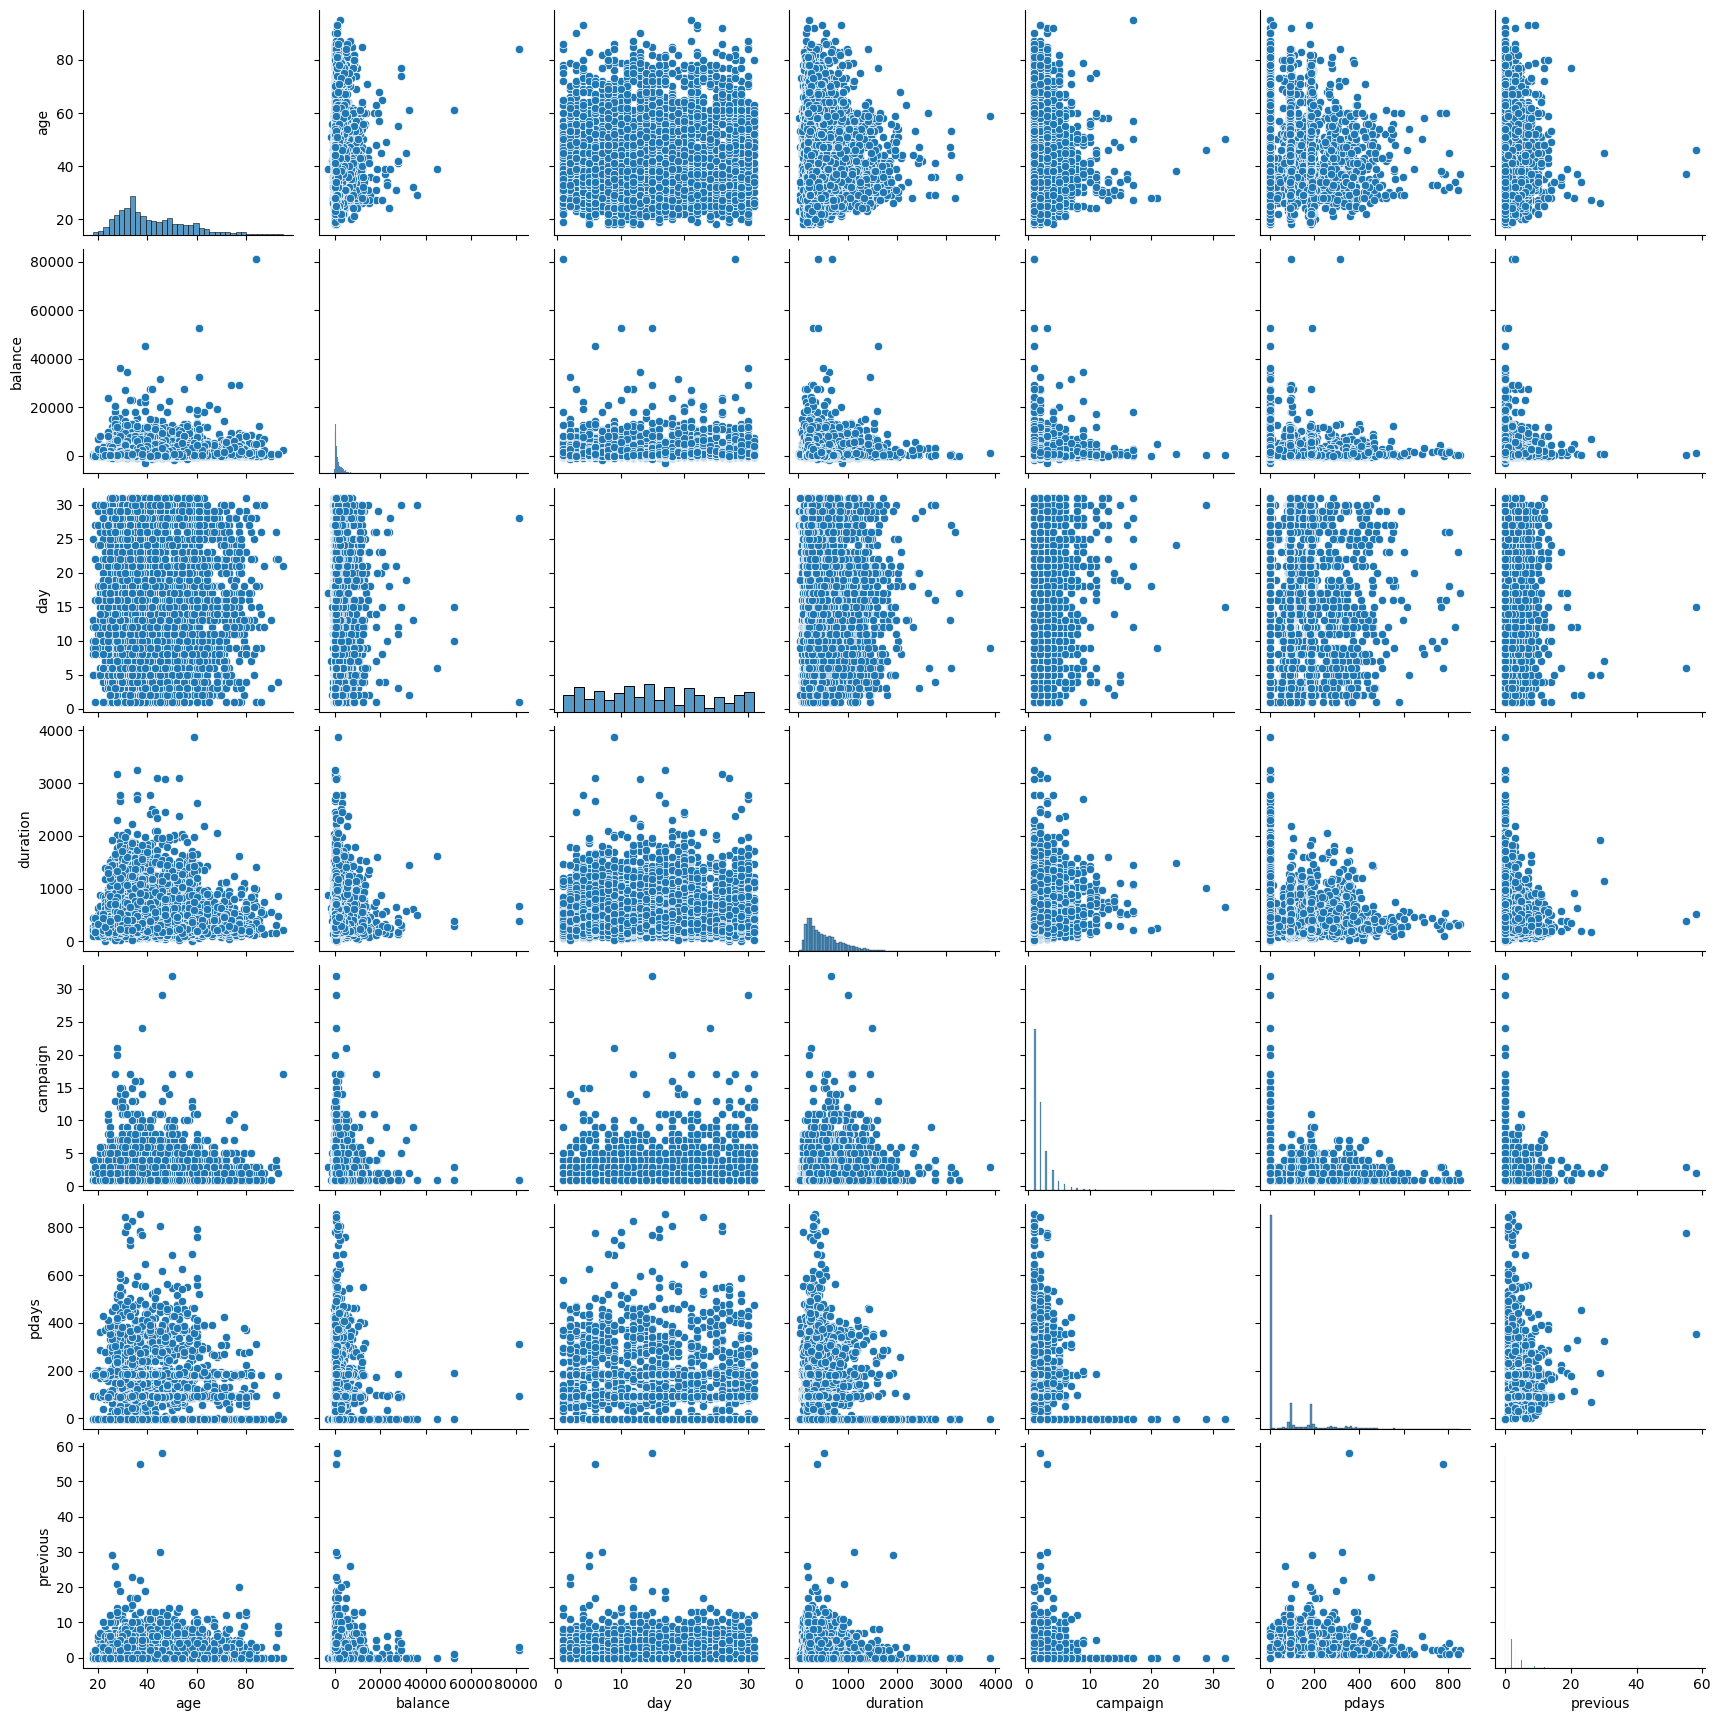

In [44]:
sns.pairplot(numerical_subscribed_df)

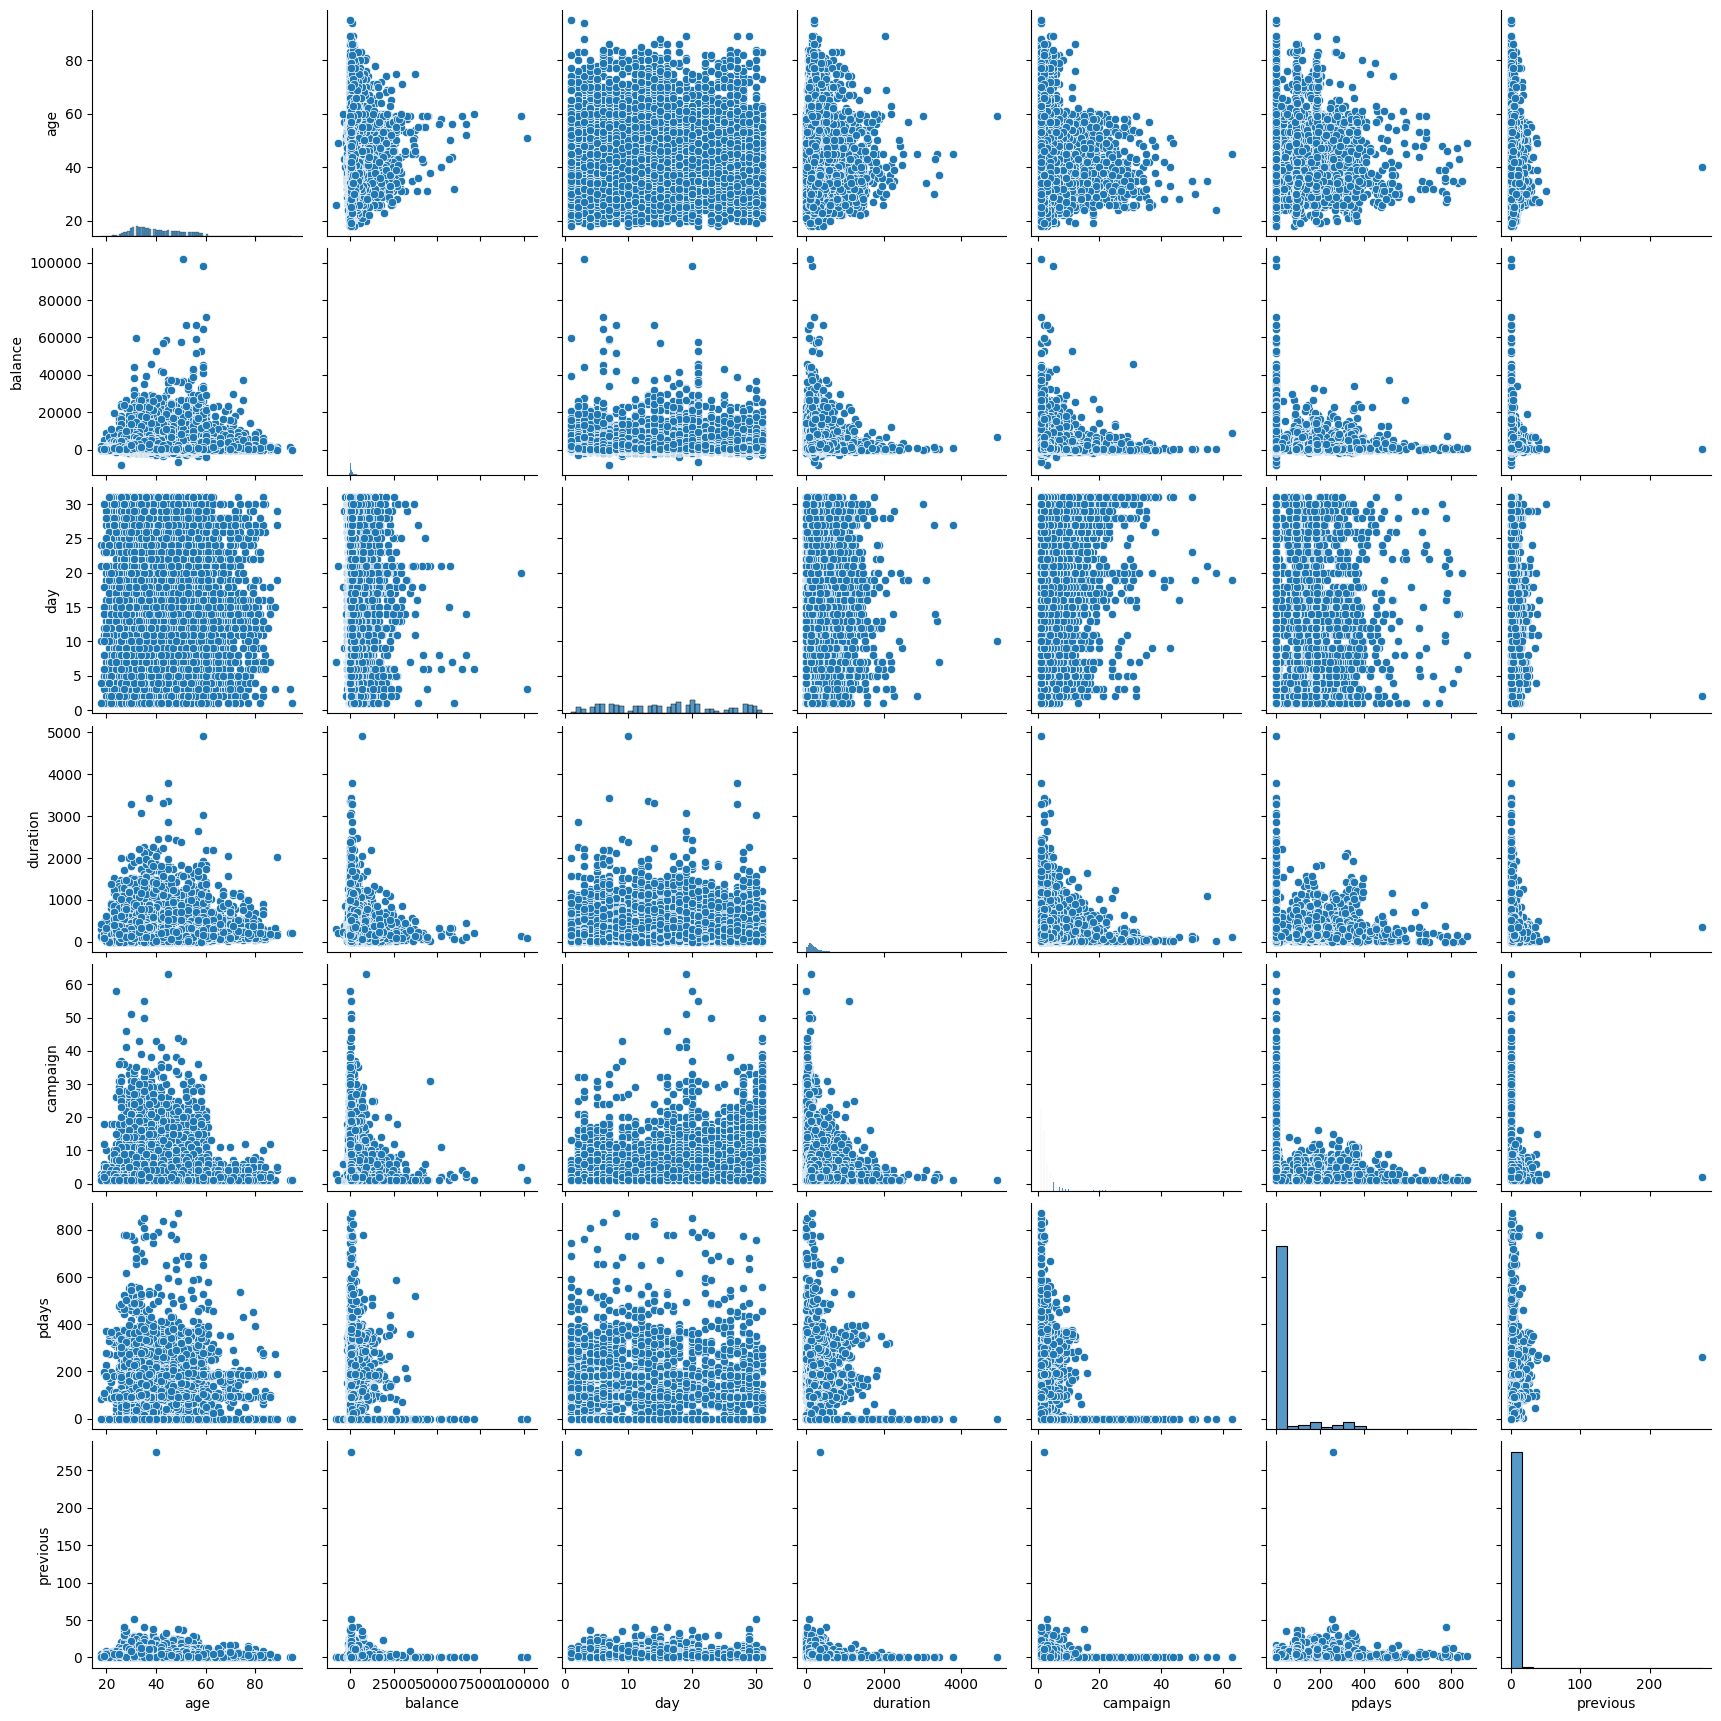

In [47]:
sns.pairplot(numerical_not_subscribed_df)

In [48]:
subscribed_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


In [49]:
not_subscribed_df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000
mean,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
std,10.172662,2974.195473,8.294728,207.383237,3.212767,96.757135,2.256771
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,58.000000,8.000000,95.000000,1.000000,-1.000000,0.000000
50%,39.000000,417.000000,16.000000,164.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


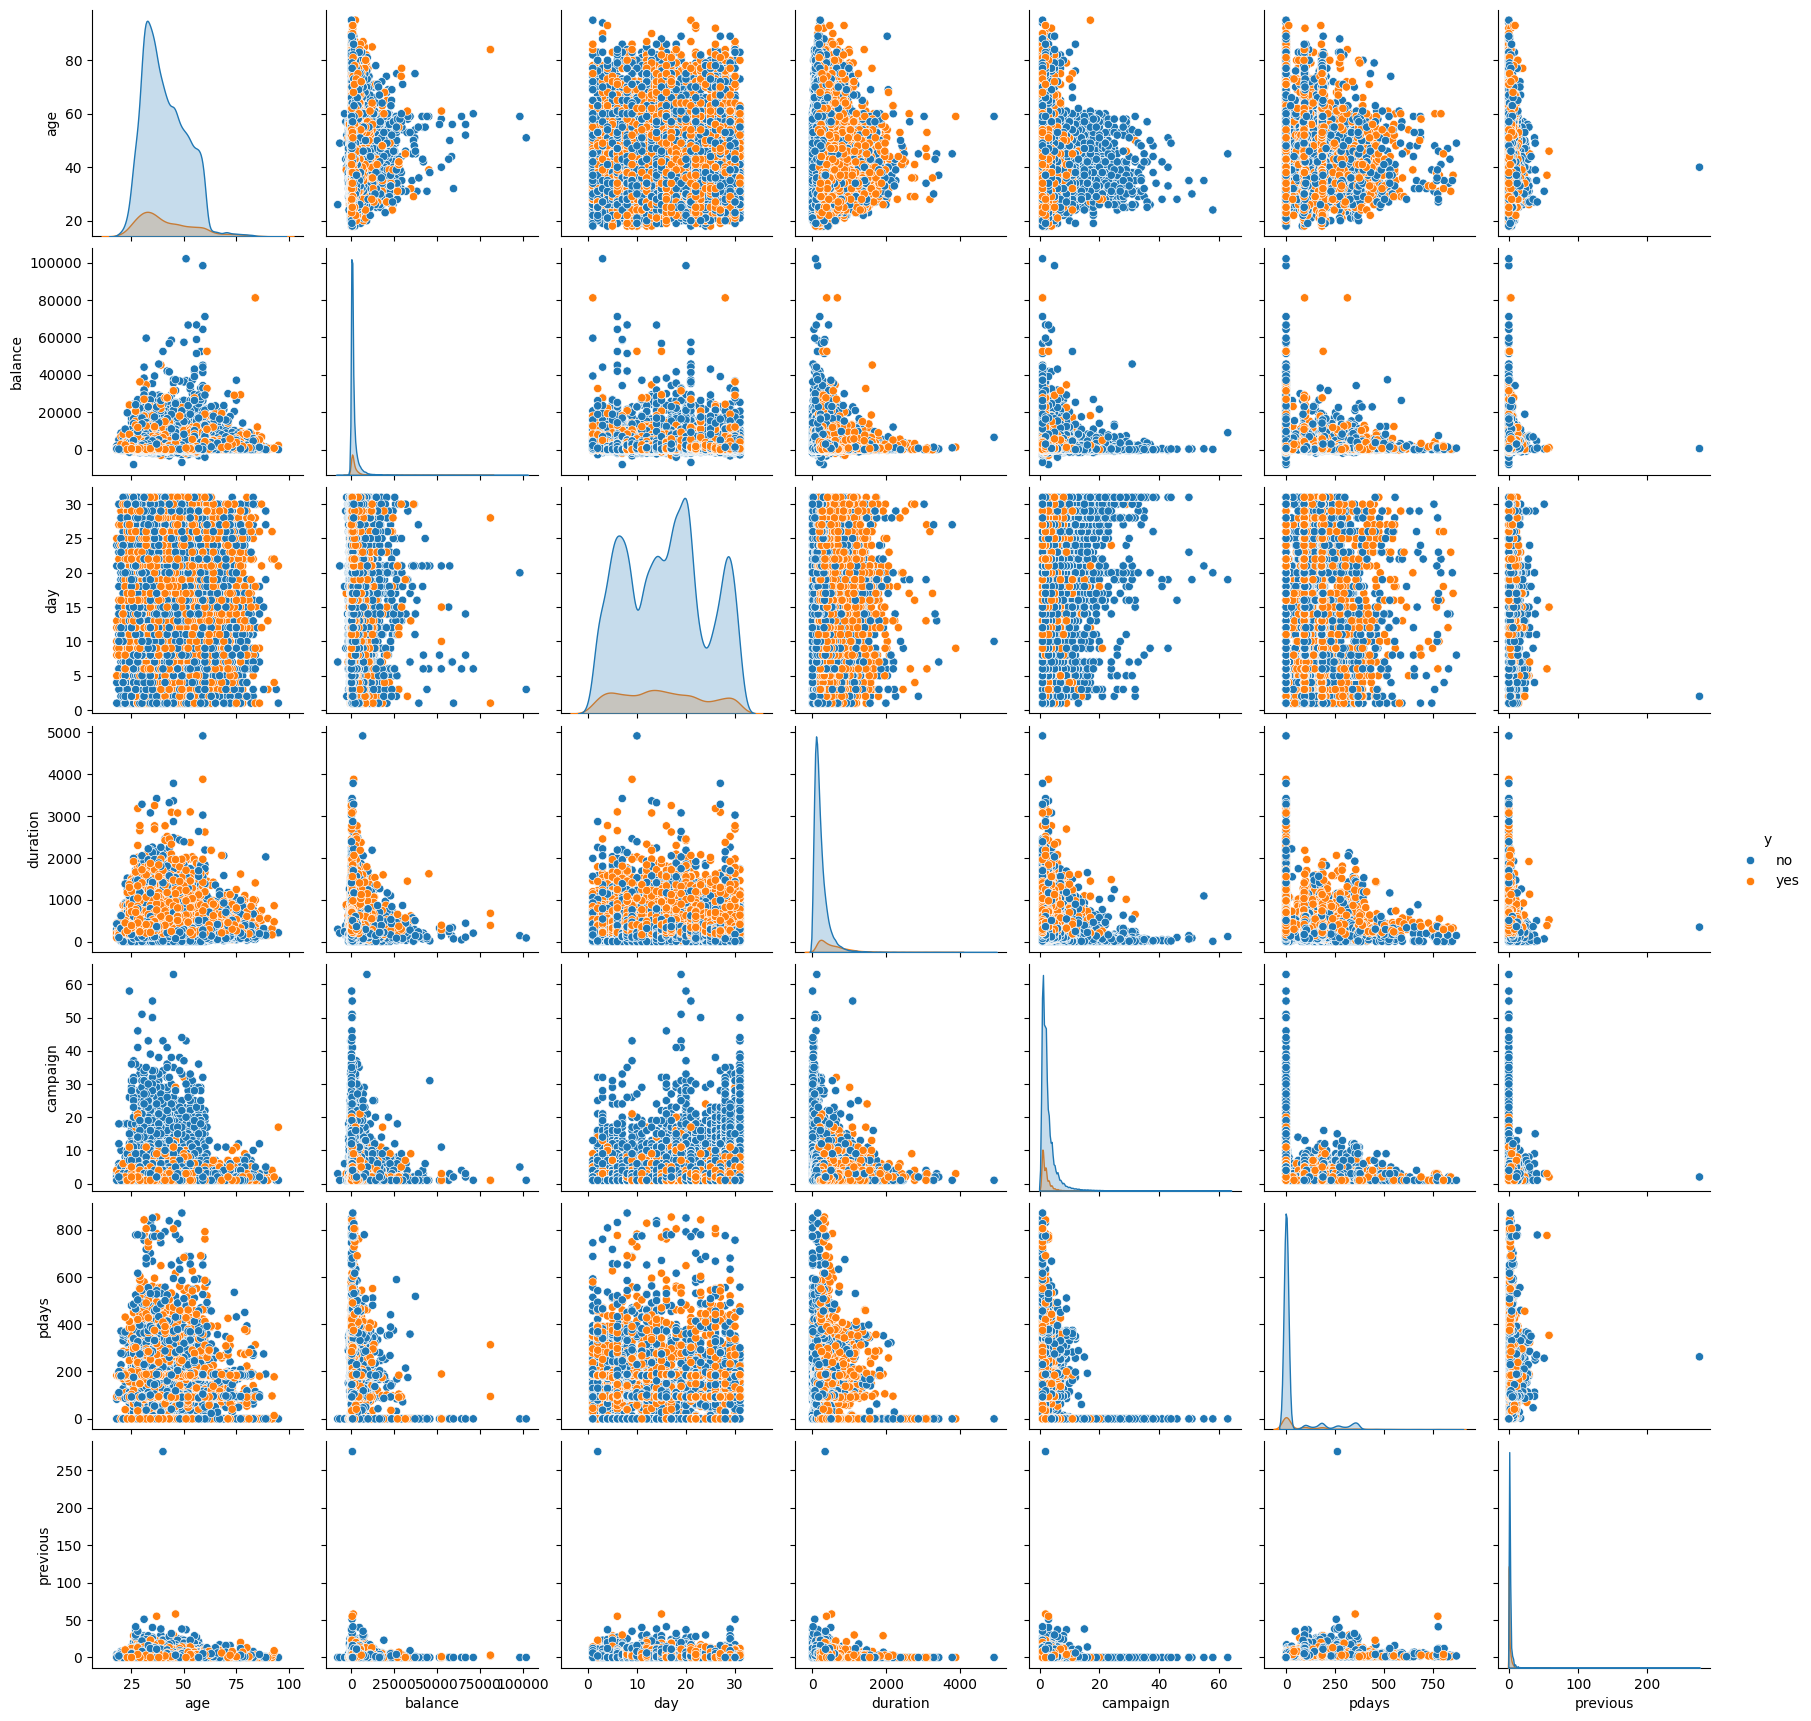

In [51]:
sns.pairplot(train_df,hue="y")